# Skewness of the Data

In this section, I will look at how skewed the data is. 

Investigating the skewness of data can bring to light any trends in the data, or detect outliers which I will come to later on.

Many financial models that are used to make predictions for a company assume a normal distribution. For a normal distribution, the data cannot be skewed. 

This is why it is important that we transform the data where necessary to bring the distribution as close to normal as possible before the data can be used in any models to make predicitions.

In [86]:
from db_utils import DataTransform, DataFrameInfo, Plotter, DataFrameTransforms, save_changes

dt = DataTransform()
df_info = DataFrameInfo()
visual = Plotter()
transform = DataFrameTransforms()

df = dt.read_data('cleaned_loan_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54151 entries, 0 to 54150
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          54151 non-null  int64  
 1   member_id                   54151 non-null  int64  
 2   loan_amount                 54151 non-null  float64
 3   funded_amount               54151 non-null  float64
 4   funded_amount_inv           54151 non-null  float64
 5   term_(months)               54151 non-null  int64  
 6   int_rate                    54151 non-null  float64
 7   instalment                  54151 non-null  float64
 8   grade                       54151 non-null  object 
 9   sub_grade                   54151 non-null  object 
 10  employment_length           54151 non-null  object 
 11  home_ownership              54151 non-null  object 
 12  annual_inc                  54151 non-null  float64
 13  verification_status         541

To begin, I will look at the skewness of each column.

Generally, any skew between -0.5 and 0.5 is acceptable and considered only moderately skewed.

Therefore, any skew that is outside of this range needs to be transformed to bring it as close to 0 as possible.

id                             2.370227
member_id                      2.205248
loan_amount                    0.804922
funded_amount                  0.820347
funded_amount_inv              0.813376
term_(months)                  1.147782
int_rate                       0.456620
instalment                     0.996572
annual_inc                     8.717500
dti                            0.189101
delinq_2yrs                    5.376385
inq_last_6mths                 3.253523
open_accounts                  1.059184
total_accounts                 0.779040
out_prncp                      2.354051
out_prncp_inv                  2.354471
total_payment                  1.269875
total_payment_inv              1.257870
total_rec_prncp                1.262679
total_rec_int                  2.204585
total_rec_late_fee            13.174553
recoveries                    14.389299
collection_recovery_fee       27.807754
last_payment_amount            2.497220
collections_12_mths_ex_med    20.307695


/Users/corynsexton/Documents/Ai_Core/EDA-Customer-Loans-in-Finance/db_utils.py:278: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  


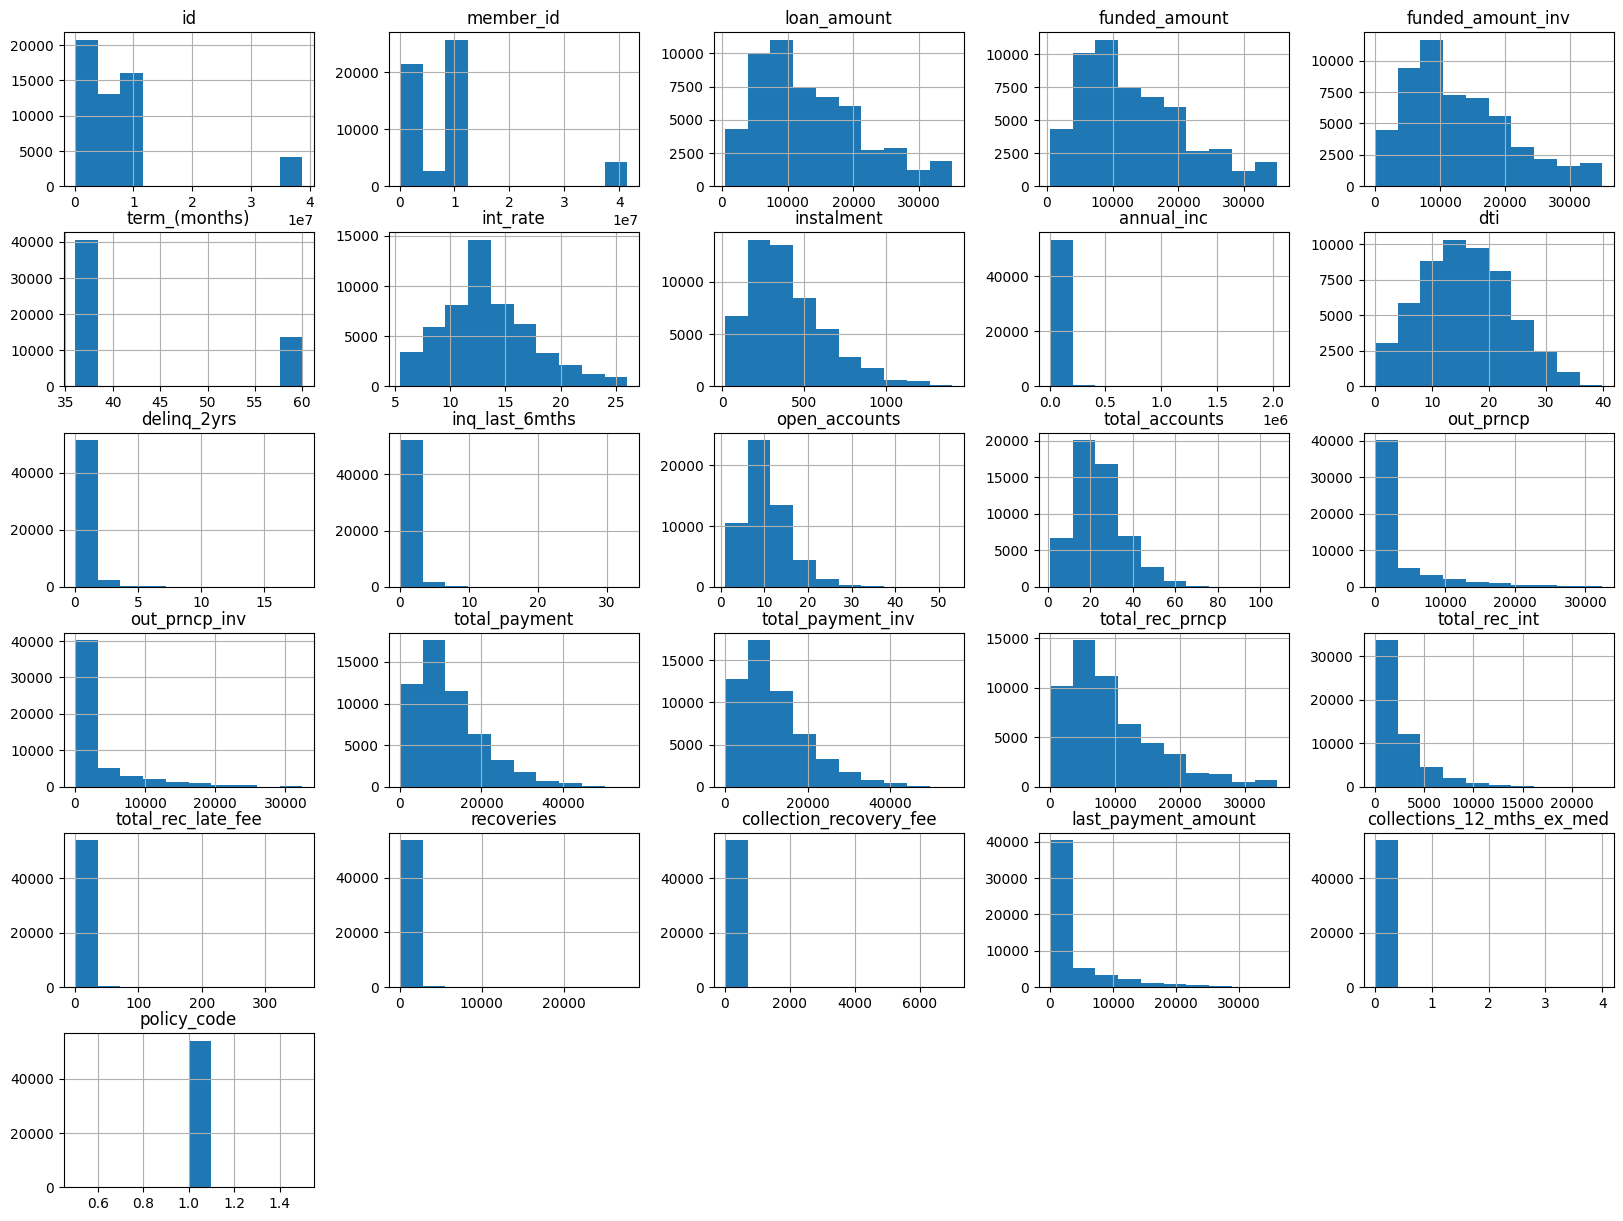

In [87]:
visual.check_skew(df)

The histogram plot shows that a lot of the data is positively skewed, also known as right-skewed. 

And I can see from the skew results that some of the data is very highly skewed, whilst others are only slightly skewed.

There are a few different transformations which I could perform on the data to reduce the skew:

- The Yeo-Johnson Transformation - For negative or positive data
- The Box-Cox Transformation - For positive data only
- The Log Transformation - Used for positively skewed, count type, positive data only

I have created methods in my `DataFrameTransforms()` class to perform all transformations. By trial and error, I have come to the conclusion that the Yeo-Johnson Transformation gives the best results for improving the skewness of each column and so I have opted to use this transformation to improve skewness.

In [88]:
transformed_df, loan_amount_power_transformer = transform.yj_transform(df, 'loan_amount')

Skewness of loan_amount before transformation: 0.8049220181025606
Skewness of loan_amount after transformation: -0.04306857925368905


In [89]:
transformed_df, funded_amount_power_transformer = transform.yj_transform(df, 'funded_amount')

Skewness of funded_amount before transformation: 0.8203473972661416
Skewness of funded_amount after transformation: -0.04123508473333888


In [90]:
transformed_df, funded_amount_inv_power_transformer = transform.yj_transform(df, 'funded_amount_inv')

Skewness of funded_amount_inv before transformation: 0.8133760847946324
Skewness of funded_amount_inv after transformation: -0.03608601971102286


In [91]:
transformed_df, term_power_transformer = transform.yj_transform(df, 'term_(months)')

Skewness of term_(months) before transformation: 1.1477822801014974


Skewness of term_(months) after transformation: 0


In [92]:
transformed_df, instalment_power_transformer = transform.yj_transform(df, 'instalment')

Skewness of instalment before transformation: 0.9965721690437305
Skewness of instalment after transformation: -0.020656313307935242


In [93]:
transformed_df, annual_inc_power_transformer = transform.yj_transform(df, 'annual_inc')

Skewness of annual_inc before transformation: 8.717499605870014
Skewness of annual_inc after transformation: -0.012084015286035203


In [94]:
transformed_df, inq_last_6mths_power_transformer = transform.yj_transform(df, 'inq_last_6mths')

Skewness of inq_last_6mths before transformation: 3.253522804381087
Skewness of inq_last_6mths after transformation: 0.25126834485088


In [95]:
transformed_df, open_accounts_power_transformer = transform.yj_transform(df, 'open_accounts')

Skewness of open_accounts before transformation: 1.0591835802494733
Skewness of open_accounts after transformation: 0.0018142275313749357


In [96]:
transformed_df, total_accounts_power_transformer = transform.yj_transform(df, 'total_accounts')

Skewness of total_accounts before transformation: 0.7790400286166349
Skewness of total_accounts after transformation: -0.012624930976857072


In [97]:
transformed_df, out_prncp_power_transformer = transform.yj_transform(df, 'out_prncp')

Skewness of out_prncp before transformation: 2.35405079479137
Skewness of out_prncp after transformation: 0.5306108732191902


In [98]:
transformed_df, out_prncp_inv_power_transformer = transform.yj_transform(df, 'out_prncp_inv')

Skewness of out_prncp_inv before transformation: 2.354471408893565
Skewness of out_prncp_inv after transformation: 0.5306286784081496


In [99]:
transformed_df, total_payment_power_transformer = transform.yj_transform(df, 'total_payment')

Skewness of total_payment before transformation: 1.2698752968451772
Skewness of total_payment after transformation: -0.013836103211456905


In [100]:
transformed_df, total_payment_inv_power_transformer = transform.yj_transform(df, 'total_payment_inv')

Skewness of total_payment_inv before transformation: 1.257870048149293
Skewness of total_payment_inv after transformation: 0.0052079210041413426


In [101]:
transformed_df, total_rec_prncp_power_transformer = transform.yj_transform(df, 'total_rec_prncp')

Skewness of total_rec_prncp before transformation: 1.2626785390807123
Skewness of total_rec_prncp after transformation: -0.017648373012226652


In [102]:
transformed_df, total_rec_int_power_transformer = transform.yj_transform(df, 'total_rec_int')

Skewness of total_rec_int before transformation: 2.2045848938701638
Skewness of total_rec_int after transformation: 0.0012930933550426276


In [103]:
transformed_df, last_payment_amount_power_transformer = transform.yj_transform(df, 'last_payment_amount')

Skewness of last_payment_amount before transformation: 2.4972203995928135
Skewness of last_payment_amount after transformation: 0.0013468089525872568


After performing the Yeo-Johnson Transformation on the above variables, it has reduced their skewness to a level that I am happy with.

I have not performed transformations on all of the variables for the following reasons..

Columns with moderate/no skew:
- `int_rate`
- `dti`
- `policy_code`

Columns which will not be analysed:
- `id`
- `member_id`

Columns containing lots of 0 values:
- `delinq_2yrs`
- `total_rec_late_fee`             
- `recoveries`        
- `collection_recovery_fee`     
- `collections_12_mths_ex_med`


id                             2.370227
member_id                      2.205248
loan_amount                   -0.043069
funded_amount                 -0.041235
funded_amount_inv             -0.036086
term_(months)                  0.000000
int_rate                       0.456620
instalment                    -0.020656
annual_inc                    -0.012084
dti                            0.189101
delinq_2yrs                    5.376385
inq_last_6mths                 0.251268
open_accounts                  0.001814
total_accounts                -0.012625
out_prncp                      0.530611
out_prncp_inv                  0.530629
total_payment                 -0.013836
total_payment_inv              0.005208
total_rec_prncp               -0.017648
total_rec_int                  0.001293
total_rec_late_fee            13.174553
recoveries                    14.389299
collection_recovery_fee       27.807754
last_payment_amount            0.001347
collections_12_mths_ex_med    20.307695


/Users/corynsexton/Documents/Ai_Core/EDA-Customer-Loans-in-Finance/db_utils.py:278: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  


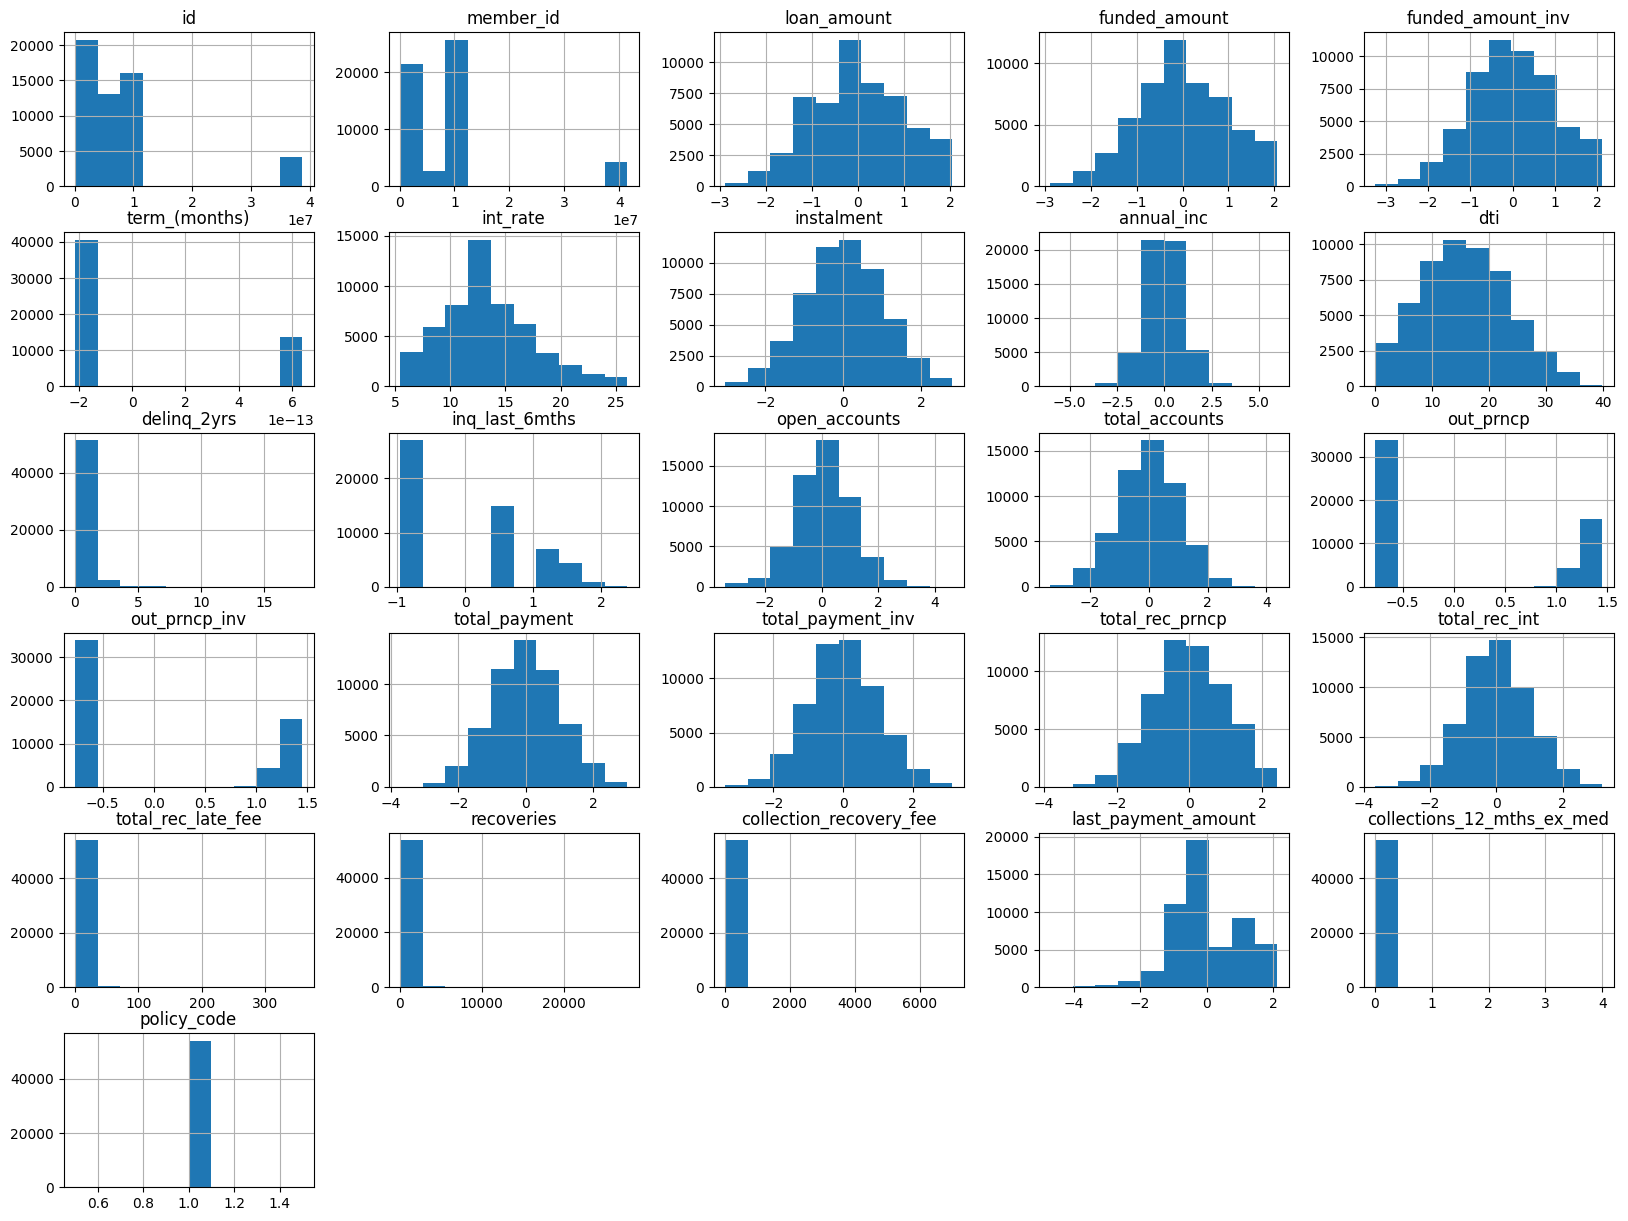

In [104]:
visual.check_skew(transformed_df)

I can clearly see the normal distribution in the histograms above so I am happy the transformations have worked and improved the skew of the data.

In [105]:
save_changes(transformed_df, 'skew_data.csv')